In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

Let's use the tools we've learned so far and the model one type we've learned to see how the modeling process works. In other words:

# You made a model, now what?

### Lab Two Questions?

Note the difference between the two models:

$$
Y_{mass} = \beta_0 + \beta_1 X_{flipper} + \beta_2 X_{is\_male}
$$

$$
Y_{mass} = \beta_0 + \beta_1 X_{flipper} + \beta_2 X_{is\_male} + \beta_3 X_{flipper} X_{is\_male}
$$

- Why might we want this extra term? What happens in these models when $X_{is\_male} = 0$ vs. $= 1$?

In [2]:
df_penguins = sns.load_dataset('penguins')
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Metrics vs. Loss

- In Machine Learning the **Loss Function** refers to the quantity used to *optimize* or create the model. Usually the loss function is minimized (This is just by convention; minimization is equivalent to maximizing the negative of a real-valued function).
- A **Metric** is the quantity used to *evaluate* the model. Usually this is the quantity we really care about.

### Example
- Predict whether a penguin's body mass is higher than average using Linear Regression.
- (We could also use Logistic Regression, but that's for next time!)

In [3]:
print(f'Mean body mass is {df_penguins["body_mass_g"].mean()}')

Mean body mass is 4201.754385964912


<function matplotlib.pyplot.show(close=None, block=None)>

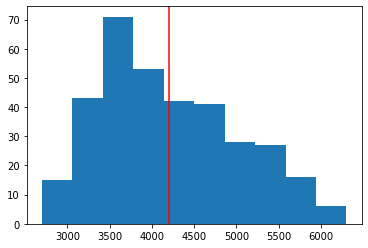

In [4]:
plt.hist(df_penguins['body_mass_g'])
plt.axvline(x=df_penguins["body_mass_g"].mean(), color='red')
plt.show

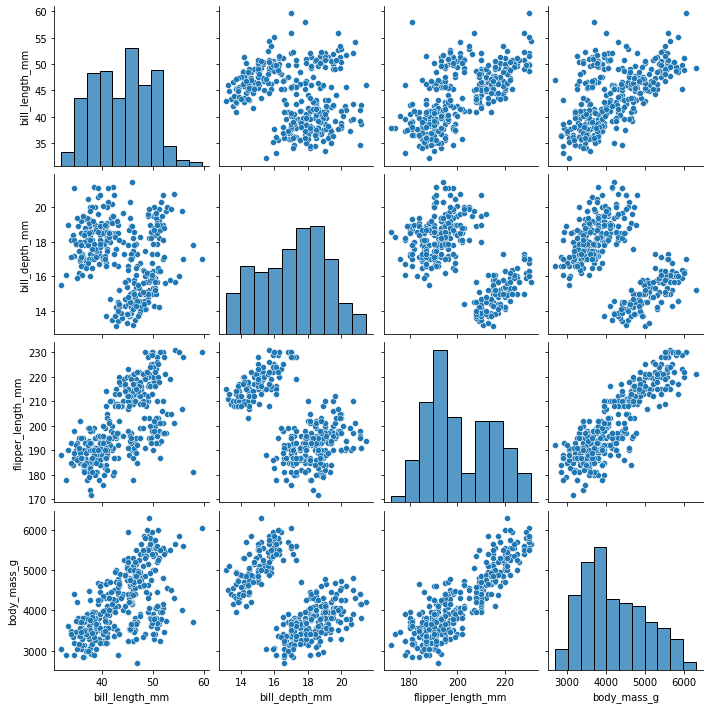

In [5]:
sns.pairplot(df_penguins)
plt.show()

In [6]:
df_penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Looks like many of the features are somewhat linearly correlated.. Let's throw them all in a model and see what happens.

In [7]:
model = ols(formula = 'body_mass_g ~ flipper_length_mm + bill_depth_mm + bill_length_mm', data=df_penguins)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     359.7
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          8.19e-105
Time:                        20:05:26   Log-Likelihood:                -2526.7
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     338   BIC:                             5077.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6424.7647    561.469    -11.443      0.000   -7529.179   -5320.351
flipper_length_mm    50.2692      2.477     20.293      0.000      45.397      55.142
bill_depth_mm        20.0495     13.694      1.464      0.144      -6.887      46.986
bill_length_mm        4.1618      5.329      0.781      0.435      -6.321      14.644
==============================================================================
Omnibus:                        5.263   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.129
Skew:                           0.298   Prob(JB):                       0.0770
Kurtosis:                       3.065   Cond. No.                     5.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- What is the Loss Function here?
- What might you use for a Metric if we care about predicting body mass accurately?

### An aside:
- For OLS, minimizing RSS is the same as maximizing $R^2$. Recall:

$$
RSS = \frac{TSS - RSS}{TSS}.
$$

Even in this case, I would call $R^2$ a metric because:
- In my final report I would record the $R^2$ value.
- I would compare the $R^2$ value with another model created in another way (maybe something fancy like a decision tree).

### Adjusted R^2

Let $n$ be the number of samples and $k$ be the number of features, then

$$
Adj \,\, R^2: 1 - (1-R^2)\frac{(n-1)}{(n-k-1)}
$$
- Think about what happens when $k$ increases. How does $n$ affect this?

Let's move on to predicting whether a penguin "is heavier" or not.

In [8]:
# create the new variable
# do you see any problems below?
df_penguins['is_heavier'] = df_penguins['body_mass_g'] >  df_penguins["body_mass_g"].mean()
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_heavier
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,False
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False


In [9]:
# fix the problem here!
df_penguins.dropna(inplace=True)
df_penguins.reset_index(inplace=True, drop=True)

Now what I *care* about is how well I predict my new variable ```is_heavier```. I no longer care about $R^2$ but maybe about **Accuracy** which is the ratio of correct predictions with the total amount of predictions.

In [10]:
# let's see how accurate this model is
y_pred = res.predict(df_penguins)
y_pred.head()

0    3211.617868
1    3438.564312
2    3906.346483
3    3816.889879
4    3702.967340
dtype: float64

In [11]:
y_pred = y_pred > df_penguins["body_mass_g"].mean()
y_pred.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [12]:
# number of correct predictions
# think about why!
correct = sum(y_pred == df_penguins['is_heavier'])
accuracy = correct / len(y_pred)
print(f'This model has accuracy: {100*accuracy}%')

This model has accuracy: 86.48648648648648%


- Nothing about the model has changed. Notice how the metric we use determines how we feel about the model.
- Other important metrics surround classification are **Precision** and **Recall** (More on this next week).
- The Confusion Matrix is very helpful to understand why a binary classification model might be classifying things the way it is.

In [13]:
# seaborn confusion matrix

- Well how can we improve this model?

## Feature Engineering
- We can think of what we did in Lab 2 as Feature Engineering.

In [14]:
df_penguins['is_male'] = df_penguins['sex'].apply(lambda x : int(x == 'Male'))
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_heavier,is_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,False,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,False,1


In [15]:
# fit the model
model = ols(formula = 'body_mass_g ~ flipper_length_mm + bill_depth_mm + bill_length_mm', data=df_penguins)
res = model.fit()

# predict
y_pred = res.predict(df_penguins)
y_pred = y_pred > df_penguins["body_mass_g"].mean()

# evaluate
correct = sum(y_pred == df_penguins['is_heavier'])
accuracy = correct / len(y_pred)
print(f'This model has accuracy: {100*accuracy}%')

This model has accuracy: 86.78678678678679%


Let's go back to the Ads dataset.

In [16]:
df_ads = pd.read_csv('data/Advertising.csv')
df_ads.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We want to predict sales so let's look at that bottom row.

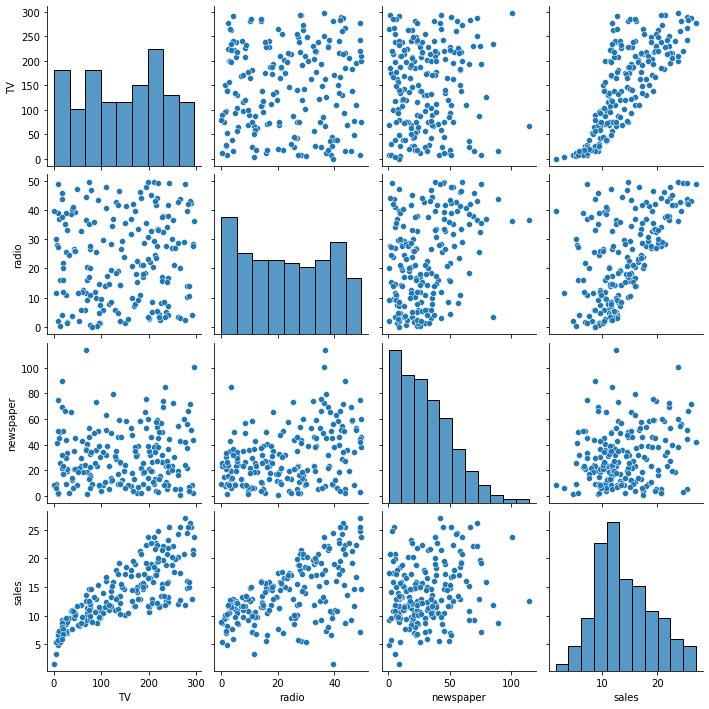

In [17]:
sns.pairplot(df_ads)

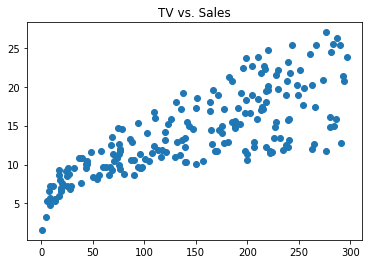

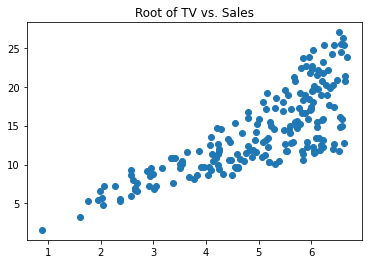

In [18]:
# tv isn't exactly linear, but looks more like a square root function
df_ads['TV_root'] = df_ads['TV']**(1/3)

plt.scatter(x=df_ads['TV'], y=df_ads['sales'])
plt.title('TV vs. Sales')
plt.show()

plt.scatter(x=df_ads['TV_root'], y=df_ads['sales'])
plt.title('Root of TV vs. Sales')
plt.show()

In [19]:
# we see slight improvement in the correlation matrix
df_ads.corr()

,TV,radio,newspaper,sales,TV_root
TV,1.000000,0.054809,0.056648,0.782224,0.962280
radio,0.054809,1.000000,0.354104,0.576223,0.017928
newspaper,0.056648,0.354104,1.000000,0.228299,0.041168
sales,0.782224,0.576223,0.228299,1.000000,0.784504
TV_root,0.962280,0.017928,0.041168,0.784504,1.000000


In [20]:
model = ols(formula = 'sales ~ TV', data=df_ads)
res = model.fit()
print(f' The R^2 using TV is {res.rsquared}')

model = ols(formula = 'sales ~ TV_root', data=df_ads)
res = model.fit()
print(f' The R^2 using square root of TV is {res.rsquared}')

 The R^2 using TV is 0.611875050850071
 The R^2 using square root of TV is 0.6154472831191032


Polynomial Regression is just linear regression with new features!

$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2
$$

In [21]:
# the dataset you will working with for HW2
df_taxis = sns.load_dataset('taxis')
df_taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [22]:
df_taxis['pickup'].head()

0    2019-03-23 20:21:09
1    2019-03-04 16:11:55
2    2019-03-27 17:53:01
3    2019-03-10 01:23:59
4    2019-03-30 13:27:42
Name: pickup, dtype: object

In [23]:
# time datatype!
pd.to_datetime(df_taxis['pickup'])

0      2019-03-23 20:21:09
1      2019-03-04 16:11:55
2      2019-03-27 17:53:01
3      2019-03-10 01:23:59
4      2019-03-30 13:27:42
               ...        
6428   2019-03-31 09:51:53
6429   2019-03-31 17:38:00
6430   2019-03-23 22:55:18
6431   2019-03-04 10:09:25
6432   2019-03-13 19:31:22
Name: pickup, Length: 6433, dtype: datetime64[ns]

In [24]:
# time delta
pd.to_datetime(df_taxis['dropoff']) - pd.to_datetime(df_taxis['pickup'])

0      0 days 00:06:15
1      0 days 00:07:05
2      0 days 00:07:24
3      0 days 00:25:52
4      0 days 00:09:32
             ...      
6428   0 days 00:03:34
6429   0 days 00:56:23
6430   0 days 00:19:07
6431   0 days 00:05:04
6432   0 days 00:16:40
Length: 6433, dtype: timedelta64[ns]

In [25]:
delta = pd.to_datetime(df_taxis['dropoff']) - pd.to_datetime(df_taxis['pickup'])
delta

0      0 days 00:06:15
1      0 days 00:07:05
2      0 days 00:07:24
3      0 days 00:25:52
4      0 days 00:09:32
             ...      
6428   0 days 00:03:34
6429   0 days 00:56:23
6430   0 days 00:19:07
6431   0 days 00:05:04
6432   0 days 00:16:40
Length: 6433, dtype: timedelta64[ns]

In [26]:
# here's a new feature: length of trip!
# converting to minutes
df_taxis['length_of_trip'] = delta / pd.Timedelta('60s')

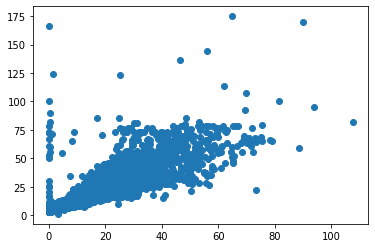

In [27]:
plt.scatter(x=df_taxis['length_of_trip'], y=df_taxis['total'])
plt.show()

How about a new categorical feature?

In [28]:
# wow there's a lot!
len(df_taxis['pickup_zone'].unique())

195

In [29]:
# which is the most frequented?
from collections import Counter

sorted_list = Counter(df_taxis['pickup_zone']).most_common()
print(sorted_list[:5])

[('Midtown Center', 230), ('Upper East Side South', 211), ('Penn Station/Madison Sq West', 210), ('Clinton East', 208), ('Midtown East', 198)]


In [30]:
df_taxis['pickup_zone_Midtown'] = df_taxis['pickup_zone'].apply(lambda x : x == 'Midtown Center')
df_taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,length_of_trip,pickup_zone_Midtown
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,6.250000,False
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,7.083333,False
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,7.400000,False
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,25.866667,False
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,9.533333,False


## Outliers
- Remember to be careful of outliers!
- Below we have vote counts for various counties in Florida from the 2000 Presidential Election.

Context:
- In the 2000 USA Presidential election, Florida was the "tipping point" state for Bush, meaning that, after ranking the states by margin of victory, Florida was the state that gave Bush enough electoral votes to win the election.
- Additionally, holding all other state results constant, if Gore had won Florida then the election would have flipped to Gore.
- Also Bush only won the state by 537 votes out of a total 6,000,000 cast 😳

In [31]:
df_votes = pd.read_csv('data/2000FL_votes.csv')
df_votes

,county,Al Gore,George W. Bush,Ralph Nader,Pat Buchanan
0,ALACHUA,47365,34124,3226,262
1,BAKER,2392,5610,53,73
2,BAY,18850,38637,828,248
3,BRADFORD,3075,5414,84,65
4,BREVARD,97318,115185,4470,570
...,...,...,...,...,...
60,UNION,1407,2332,33,26
61,VOLUSIA,97304,82357,2910,396
62,WAKULLA,3838,4512,149,46
63,WALTON,5642,12182,265,120


More context
- Pat Buchanan was another conservative candidate with a similar platform as George W. Bush.
- Counties with a large number of conservative voters would likely see more votes for both Bush and Buchanan
- We can expect to see some correlation here between the two vote counts.

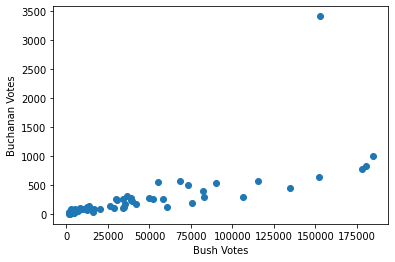

In [32]:
plt.scatter(x=df_votes['George W. Bush'], y=df_votes['Pat Buchanan'])
plt.xlabel('Bush Votes')
plt.ylabel('Buchanan Votes')
plt.show()

Controversy!
- But wait what is that?
- The county of Palm Beach used what were called [Butterfly Ballots](https://upload.wikimedia.org/wikipedia/commons/4/4e/Butterfly_Ballot%2C_Florida_2000_%28large%29.jpg).
- The claim is that many Gore voters accidentally voted for Pat Buchanan. (Research paper [here](https://www.gsb.stanford.edu/faculty-research/publications/butterfly-did-it-aberrant-vote-buchanan-palm-beach-county-florida) giving evidence for this claim)

Pay attention to the confidence interval.

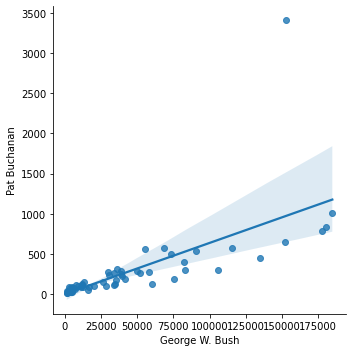

In [33]:
sns.lmplot(x='George W. Bush', y='Pat Buchanan', data=df_votes)
plt.show()

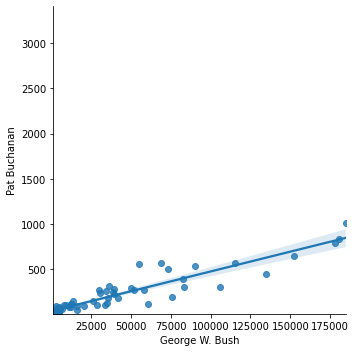

In [34]:
# remove palm beach
df_votes_nopb = df_votes[df_votes['county'] != 'PALM BEACH']

sns.lmplot(x='George W. Bush', y='Pat Buchanan', data=df_votes_nopb)

# keep same x,y limits
plt.xlim(min(df_votes['George W. Bush']), max(df_votes['George W. Bush']))
plt.ylim(min(df_votes['Pat Buchanan']), max(df_votes['Pat Buchanan']))

plt.show()

In [35]:
model = ols(formula = 'PB ~ GWB', data=df_votes.rename(columns={'Pat Buchanan': 'PB',
                                                                'George W. Bush': 'GWB'}))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PB   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     55.86
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           2.97e-10
Time:                        20:05:29   Log-Likelihood:                -468.75
No. Observations:                  65   AIC:                             941.5
Df Residuals:                      63   BIC:                             945.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0329     53.677      0.019      0.985    -106.233     108.299
GWB            0.0064      0.001      7.474      0.000       0.005       0.008
==============================================================================
Omnibus:                      122.940   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5601.188
Skew:                           6.163   Prob(JB):                         0.00
Kurtosis:                      46.774   Cond. No.                     8.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model = ols(formula = 'PB ~ GWB', data=df_votes_nopb.rename(columns={'Pat Buchanan': 'PB',
                                                                'George W. Bush': 'GWB'}))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PB   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     393.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           1.54e-28
Time:                        20:05:29   Log-Likelihood:                -372.29
No. Observations:                  64   AIC:                             748.6
Df Residuals:                      62   BIC:                             752.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.5118     13.370      2.955      0.004      12.785      66.238
GWB            0.0044      0.000     19.835      0.000       0.004       0.005
==============================================================================
Omnibus:                       11.816   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               21.408
Skew:                           0.544   Prob(JB):                     2.25e-05
Kurtosis:                       5.616   Cond. No.                     7.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation

Look how small that coefficient is! Is there a relationship between Bush and Buchanan votes? Why or why not?

## Prediction
How well does my model perform on unseen data?

In [37]:
df_penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,is_heavier,is_male
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.443729,0.344078
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.541841,0.372673
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.768537,0.255169
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.852768,0.424987
is_heavier,0.443729,-0.541841,0.768537,0.852768,1.000000,0.228309
is_male,0.344078,0.372673,0.255169,0.424987,0.228309,1.000000


In [38]:
model = ols(formula = 'body_mass_g ~ flipper_length_mm', data=df_penguins)
res = model.fit()
print(f'This model has an R^2 of {res.rsquared}')

This model has an R^2 of 0.7620921573403914


What about penguin data points not used to build the model?

In [39]:
from sklearn.model_selection import train_test_split

# take random 10% of the penguins for testing
train, test = train_test_split(df_penguins, test_size=0.1)

- This is a **Train**-**Test** split. The training set is used to create the model while the test set is used to evaluate the model.
- The test set is "unseen" data for the model. It did not "know" what the RSS values were for these penguins during model creation.

In [40]:
# build model on training set
model = ols(formula = 'body_mass_g ~ flipper_length_mm', data=train)
res = model.fit()

# predict using the model
y_pred = res.predict(test)

# score the model
y = test['body_mass_g']
y_mean = train['body_mass_g'].mean()  # use the mean of the training set

TSS = sum((y_pred - y_mean)**2)
RSS = sum((y_pred - y)**2)
print(f'This model has an R^2 on the test set of {(TSS - RSS) / TSS}')

This model has an R^2 on the test set of 0.59629952923365


- Why did it go down?
- Is this bad?

## Under/Overfitting

There are two problems one often faces with a train-test split:
- Overfitting: The model performs well on training data, but the model performs poorly on the test data
- Underfitting: The model performs poorly on the training data

This is related to the *Bias-Variance Tradeoff* which we will discuss in Lecture 6.

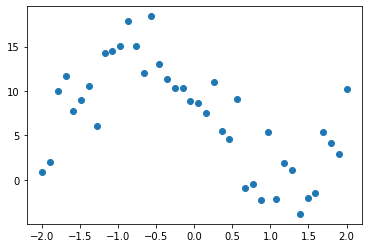

In [41]:
# let's make some fake nonlinear data to illustrate this
num_pts = 40
x = np.linspace(-2, 2, num_pts)

# noise
epsilon = np.random.normal(0, 3, num_pts)

# degree 3 polynomial
y = 3*(x-1)*(x+2)*(x-1.5) + epsilon

plt.scatter(x=x, y=y)
plt.show()

In [42]:
model = sm.OLS(y, sm.add_constant(x), hasconst=True)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     15.22
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           0.000378
Time:                        20:05:30   Log-Likelihood:                -121.09
No. Observations:                  40   AIC:                             246.2
Df Residuals:                      38   BIC:                             249.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0715      0.810      8.729      0.000       5.431       8.712
x1            -2.6695      0.684     -3.901      0.000      -4.055      -1.284
==============================================================================
Omnibus:                        0.700   Durbin-Watson:                   0.718
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.796
Skew:                          -0.257   Prob(JB):                        0.672
Kurtosis:                       2.539   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see from the $R^2$ and visually that the line is underfitting the data.

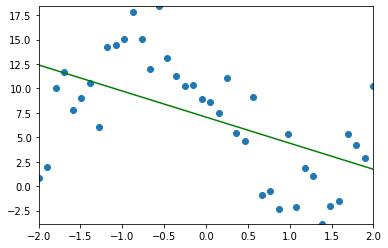

In [43]:
b, m = res.params

plt.scatter(x=x, y=y)

plt.axline((0, b), slope=m, color='green')

plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
plt.show()

Now let's do some feature engineering. Let's create polynomial features and do a linear regression (polynomial regression).

In [44]:
df = pd.DataFrame({'x':x, 'y':y})

n = 30

for i in range(n-1):
    df[f'x_{i+2}'] = x**(i+2)
df.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30
0,-2.000000,0.874436,4.000000,-8.000000,16.000000,-32.000000,64.000000,-128.000000,256.000000,-512.000000,...,-2.097152e+06,4.194304e+06,-8.388608e+06,1.677722e+07,-3.355443e+07,6.710886e+07,-1.342177e+08,2.684355e+08,-5.368709e+08,1.073742e+09
1,-1.897436,1.986892,3.600263,-6.831268,12.961894,-24.594362,46.666226,-88.546172,168.010685,-318.789504,...,-6.942396e+05,1.317275e+06,-2.499445e+06,4.742537e+06,-8.998659e+06,1.707438e+07,-3.239754e+07,6.147226e+07,-1.166397e+08,2.213163e+08
2,-1.794872,10.037563,3.221565,-5.782296,10.378480,-18.628040,33.434944,-60.011438,107.712837,-193.330733,...,-2.161236e+05,3.879141e+05,-6.962560e+05,1.249690e+06,-2.243034e+06,4.025958e+06,-7.226079e+06,1.296988e+07,-2.327928e+07,4.178332e+07
3,-1.692308,11.669147,2.863905,-4.846609,8.201954,-13.880229,23.489619,-39.751663,67.272045,-113.844999,...,-6.281537e+04,1.063029e+05,-1.798973e+05,3.044415e+05,-5.152087e+05,8.718917e+05,-1.475509e+06,2.497015e+06,-4.225718e+06,7.151215e+06
4,-1.589744,7.765619,2.527285,-4.017735,6.387168,-10.153959,16.142191,-25.661945,40.795913,-64.855042,...,-1.689930e+04,2.686555e+04,-4.270934e+04,6.789691e+04,-1.079387e+05,1.715948e+05,-2.727917e+05,4.336689e+05,-6.894224e+05,1.096005e+06


In [45]:
indep_var = 'x'
for i in range(n-1):
    indep_var = indep_var + f' + x_{i+2}'
print(indep_var)

model = ols(formula = f'y ~ {indep_var}', data=df)
res = model.fit()
res.summary()

x + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_10 + x_11 + x_12 + x_13 + x_14 + x_15 + x_16 + x_17 + x_18 + x_19 + x_20 + x_21 + x_22 + x_23 + x_24 + x_25 + x_26 + x_27 + x_28 + x_29 + x_30


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     9.161
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           0.000233
Time:                        20:05:30   Log-Likelihood:                -64.000
No. Observations:                  40   AIC:                             186.0
Df Residuals:                      11   BIC:                             235.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5668      1.736      4.359      0.001       3.746      11.387
x            -12.3225     16.567     -0.744      0.473     -48.787      24.142
x_2          211.0150    120.617      1.749      0.108     -54.462     476.492
x_3          468.8450    510.864      0.918      0.378    -655.558    1593.248
x_4        -4953.9682   2294.877     -2.159      0.054      -1e+04      97.022
x_5        -7201.0823   5645.499     -1.276      0.228   -1.96e+04    5224.577
x_6         4.626e+04   1.91e+04      2.428      0.034    4329.048    8.82e+04
x_7         4.713e+04    3.1e+04      1.521      0.156   -2.11e+04    1.15e+05
x_8        -2.225e+05   8.62e+04     -2.581      0.026   -4.12e+05   -3.28e+04
x_9        -1.696e+05    9.9e+04     -1.714      0.115   -3.87e+05    4.82e+04
x_10        6.356e+05   2.39e+05      2.654      0.022    1.08e+05    1.16e+06
x_11        3.765e+05   2.01e+05      1.870      0.088   -6.67e+04     8.2e+05
x_12       -1.173e+06   4.38e+05     -2.678      0.021   -2.14e+06   -2.09e+05
x_13         -5.5e+05   2.76e+05     -1.996      0.071   -1.16e+06    5.64e+04
x_14        1.475e+06   5.52e+05      2.674      0.022    2.61e+05    2.69e+06
x_15        5.502e+05   2.62e+05      2.099      0.060   -2.67e+04    1.13e+06
x_16       -1.303e+06   4.91e+05     -2.654      0.022   -2.38e+06   -2.22e+05
x_17       -3.852e+05   1.76e+05     -2.183      0.052   -7.74e+05    3158.652
x_18         8.22e+05   3.13e+05      2.627      0.024    1.33e+05    1.51e+06
x_19        1.904e+05   8.45e+04      2.251      0.046    4270.506    3.76e+05
x_20       -3.721e+05   1.43e+05     -2.596      0.025   -6.88e+05   -5.66e+04
x_21       -6.601e+04   2.86e+04     -2.307      0.041   -1.29e+05   -3044.260
x_22        1.198e+05   4.67e+04      2.565      0.026     1.7e+04    2.23e+05
x_23         1.57e+04   6671.775      2.353      0.038    1015.485    3.04e+04
x_24       -2.675e+04   1.06e+04     -2.534      0.028      -5e+04   -3518.596
x_25       -2437.2097   1019.417     -2.391      0.036   -4680.932    -193.487
x_26        3932.5523   1569.624      2.505      0.029     477.833    7387.271
x_27         222.2133     91.758      2.422      0.034      20.256     424.170
x_28        -342.1840    138.070     -2.478      0.031    -646.073     -38.294
x_29          -9.0179      3.685     -2.447      0.032     -17.128      -0.908
x_30          13.3369      5.436      2.453      0.032       1.372      25.302
==============================================================================
Omnibus:                        0.781   Durbin-Watson:                   3.763
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.161
Skew:                          -0.017   Prob(JB):                        0.923
Kurtosis:                       3.309   Cond. No.                     6.72e+14
==

Looks like a good $R^2$! But wait one second..

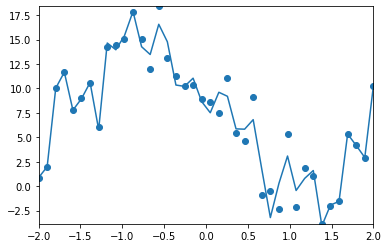

In [46]:
plt.scatter(x=x, y=y)

# plot the polynomial
coefs = list(res.params)
coefs.reverse()
poly = [np.polyval(coefs, i) for i in x]
plt.plot(x, poly)

plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
plt.show()

That doesn't seem right.. What happens if create a test set:

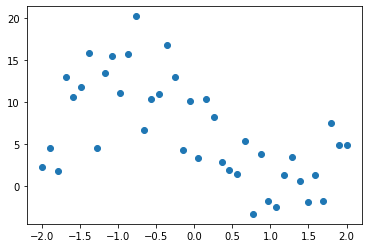

In [47]:
x_test = np.linspace(-2,2,num_pts)
epsilon = np.random.normal(0,3,num_pts)

# degree 3 polynomial
y_test = 3*(x_test-1)*(x_test+2)*(x_test-1.5) + epsilon

plt.scatter(x=x_test, y=y_test)
plt.show()

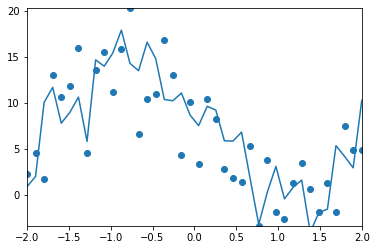

In [48]:
plt.scatter(x=x_test, y=y_test)

plt.plot(x, poly)

plt.xlim(min(x_test), max(x_test))
plt.ylim(min(y_test), max(y_test))
plt.show()

In [49]:
train_mean = y.mean()
y_pred = [np.polyval(coefs, i) for i in x_test]

tss = sum((y_test - train_mean)**2)
rss = sum((y_test - y_pred)**2)

r2 = (tss - rss) / tss
print(f'The R squared for this model is {r2}')

The R squared for this model is 0.5603726681206658


We want to find that sweet spot between underfitting and overfitting!
- **Cross Validation**: Split the dataset into disjoint pieces. Use each piece as a **validation** set and train the model on the rest of the data. Average the metrics over the pieces.
- $k$-fold: split training set into $k$ equal, disjoint sets.
- Leave Out One Cross Validation (LOOCV): Each data point is a piece.
- **Bootstrapping**: Do this *with replacement* rather than disjoint pieces.

### Data Leakage
- Why train, *validation*, test split?
- **Data Leakage in Machine Learning** is when information about the test set used to evalute the model or the target variable *leaks* into the modeling process.

Let's say I create a test set from my training data, and I run a linear regression. The $R^2$ isn't where I hoped, so I remove some outliers from the training data. It goes up! Great. Now I engineer 5 features. I see which of these features improves the $R^2$ the most on the test set, and decide to keep that one in my model. My final model is created on the training set with the outliers removed and my best engineered feature. I report the $R^2$ of this model's predictions on the test set.

- Why can't I trust these results?

In [50]:
# which of these variables
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_heavier,is_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,False,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,False,1


If I'm creating a model to predict penguin weight in a zoo, then maybe I won't know what ```island``` a penguin is from! In this case invalid information about the target variable has leaked into the model if I use ```island``` since I won't have this information when used in reality. My model will be overly confident.